In [1]:
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
columns = ['0','1']
data = pd.read_csv("Data/facebook_combined.txt",sep=' ')
data.head()

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


In [3]:
G1 = nx.read_edgelist("Data/facebook_combined.txt",create_using=nx.DiGraph(),nodetype=int)

In [4]:
Nodes = np.array(G1.nodes)
Edges = np.array(G1.edges)

In [5]:
Out_degree = dict(G1.out_degree(Nodes))
In_degree = dict(G1.in_degree(Nodes))

In [6]:
max_out_degree = max(zip(Out_degree.values(),Out_degree.keys()))
print(f"Node: {max_out_degree[1]} \nDegree: {max_out_degree[0]}")

Node: 107 
Degree: 1043


In [7]:
max_in_degree = max(zip(In_degree.values(),In_degree.keys()))
print(f"Node: {max_in_degree[1]} \nDegree: {max_in_degree[0]}")

Node: 1888 
Degree: 251


In [8]:
sample_node = 107
In_degree[107]/(In_degree[107]+Out_degree[107])**2

1.8314599024747603e-06

In [9]:
from sources.Fitness import FitnessFunc
seed_nodes = pd.DataFrame(columns=['Nodes','Fitness',"Edges"])
Nodes_= FitnessFunc(In_degree,Out_degree,G1)[0]
Fitness_ = FitnessFunc(In_degree,Out_degree,G1)[1]
Edges_ = FitnessFunc(In_degree,Out_degree,G1)[2]
seed_nodes["Nodes"] = Nodes_
seed_nodes['Fitness'] = Fitness_
seed_nodes['Edges'] = Edges_
seed_nodes.head()

,Nodes,Fitness,Edges
0,0,0.00000,"((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6..."
1,1,0.00346,"((1, 48), (1, 53), (1, 54), (1, 73), (1, 88), ..."
2,2,0.01000,"((2, 20), (2, 115), (2, 116), (2, 149), (2, 22..."
3,3,0.00346,"((3, 9), (3, 25), (3, 26), (3, 67), (3, 72), (..."
4,4,0.01000,"((4, 78), (4, 152), (4, 181), (4, 195), (4, 21..."


In [20]:
seed_nodes = seed_nodes[seed_nodes['Edges'].map(lambda d: len(d))>0]

In [22]:
seed_nodes.sort_values('Fitness',ascending=True)

,Nodes,Fitness,Edges
0,0,0.000000,"((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6..."
1831,686,0.000000,"((686, 687), (686, 688), (686, 689), (686, 690..."
107,107,0.000002,"((107, 171), (107, 348), (107, 353), (107, 363..."
352,1912,0.000012,"((1912, 1913), (1912, 1914), (1912, 1915), (19..."
1821,3437,0.000017,"((3437, 3438), (3437, 3439), (3437, 3440), (34..."
...,...,...,...
160,160,0.250000,"((160, 260))"
154,154,0.250000,"((154, 219))"
153,153,0.250000,"((153, 280))"
1746,581,0.250000,"((581, 642))"


(1.0, 10.0)

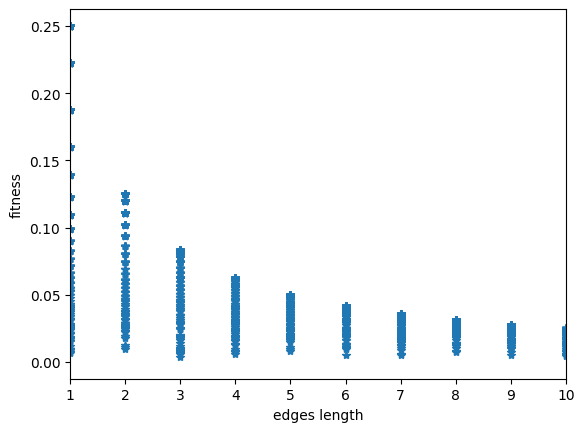

In [37]:
plt.plot(seed_nodes['Edges'].str.len(),seed_nodes['Fitness'],"*")
plt.xlabel("edges length")
plt.ylabel("fitness")
plt.xlim([1,10])